# Show us your skills : Twitter Data



In [137]:
from pathlib import Path 
import json 
import re
import textwrap
import openai
import random
import datetime
from matplotlib import pyplot as plt 
import collections

In [163]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('science.mplstyle')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'

In [184]:
with open("../OPENAIkey.txt", 'r', encoding='utf-8') as infile:
    openai.api_key =  infile.read().rstrip()

## Data Analysis 

In [87]:
tweet_file = open("./ECE219_tweet_data/tweets_#gohawks.txt", "r")

In [86]:
count = 0 
for line in tweet_file:
    count += 1
    
    if count == 2:
        break 
        
    json_object = json.loads(line)
    print(json_object["firstpost_date"])

1419962615


In [171]:
def count_tweets_per_hour(file):
    
    """
    Function to Calculate
    1. Tweets per hour for a given tweet file
    2. Average number of followers per tweet 
    3. Average number of retweets per tweet 
    
    Input : Tweet file with metadata. 
    Output : list contatining the required values. 
    """
    
    tweet_file = open(file, "r")
    tweet_count = 0 
    follower_count = 0 
    retweet_count = 0 
    time_stamps = dict() 
    for line in tweet_file:
        
        json_object = json.loads(line)
        unix_time = json_object["citation_date"]
        my_datetime = datetime.datetime.fromtimestamp(unix_time)
        rounded_datetime = my_datetime.replace(second=0, microsecond=0, minute=0) + datetime.timedelta(hours=round(my_datetime.minute / 60))
        
        tweet_count += 1 
        follower_count += json_object['author']['followers']
        retweet_count += json_object['metrics']['citations']['total']
        if rounded_datetime in time_stamps:
            time_stamps[rounded_datetime] += 1 

        else:
            time_stamps[rounded_datetime] = 1


    return [round(sum(time_stamps.values())/len(time_stamps), 2), round(follower_count/tweet_count, 2), round(retweet_count/tweet_count, 2)]

In [167]:
def plot_tweets_per_hour(file, save_file):
    
    """
    Function that plots tweets per hour as a barplot given a file 
    Input : Tweet file with metadata. 
    Output : required plot 
    """
    
    tweet_file = open(file, "r")
    tweet_count = 0 
    time_stamps = dict() 
    
    for line in tweet_file:
        
        json_object = json.loads(line)
        unix_time = json_object["citation_date"]
        my_datetime = datetime.datetime.fromtimestamp(unix_time)
        rounded_datetime = my_datetime.replace(second=0, microsecond=0, minute=0) + datetime.timedelta(hours=round(my_datetime.minute / 60))
        
        if rounded_datetime in time_stamps:
            time_stamps[rounded_datetime] += 1 

        else:
            time_stamps[rounded_datetime] = 1
    
    od = collections.OrderedDict(sorted(time_stamps.items()))
    dates = [] 
    tweets = []
    
    count = 1 
    for key, value in od.items():
        dates.append(count)
        tweets.append(value)
        count+= 1
    
    plt.bar(dates, tweets)
    plt.title("Number of tweets per hour")
    plt.ylabel("Number of tweets")
    plt.xlabel("Hours min to max mapped as integers starting from 1")
    plt.savefig(save_file, dpi=500, bbox_inches='tight')
    
    plt.show()
    
    return od

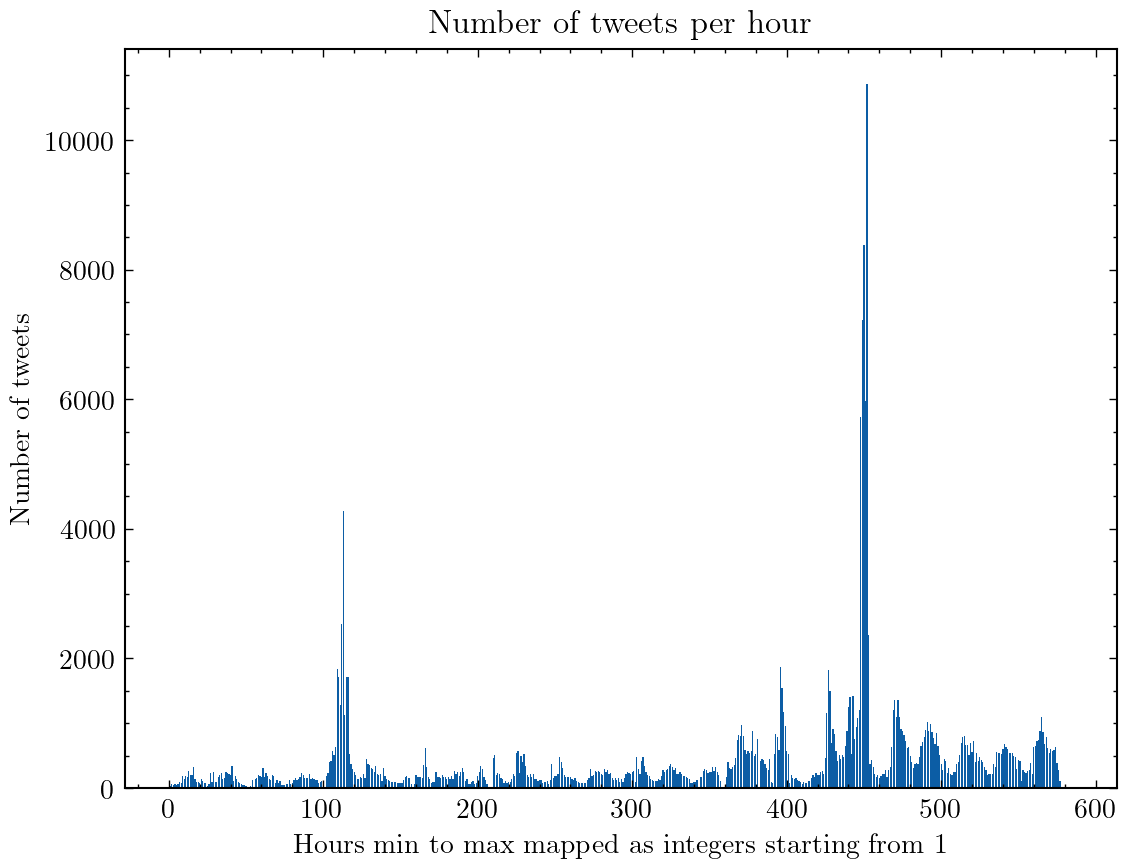

In [168]:
# NFL tweets 
nfl_time_stamps = plot_tweets_per_hour("./ECE219_tweet_data/tweets_#nfl.txt", "Q9.2_nfl.pdf")

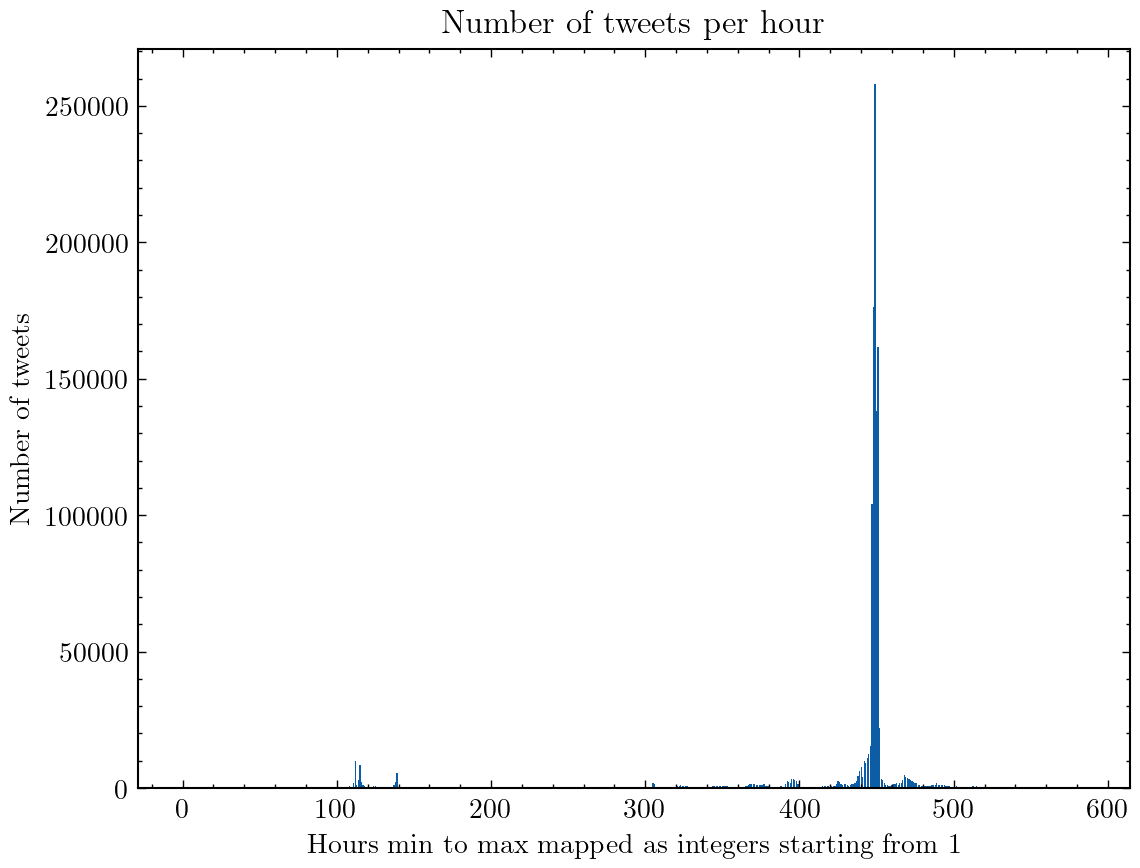

In [170]:
# Superbowl tweets 
sb_time_stamps = plot_tweets_per_hour("./ECE219_tweet_data/tweets_#superbowl.txt", "Q9.2_sb.pdf")

In [181]:
sb_time_stamps.values()

odict_values([3, 7, 11, 10, 11, 13, 14, 23, 33, 65, 55, 60, 46, 57, 48, 35, 31, 17, 19, 20, 31, 23, 14, 21, 7, 8, 12, 11, 23, 17, 17, 32, 52, 58, 49, 32, 57, 51, 55, 49, 32, 41, 21, 23, 20, 26, 19, 28, 6, 9, 2, 8, 20, 21, 52, 81, 84, 61, 74, 113, 106, 74, 63, 53, 51, 40, 45, 28, 19, 31, 18, 10, 4, 7, 8, 6, 16, 19, 18, 37, 43, 40, 56, 48, 60, 47, 39, 36, 34, 56, 39, 40, 41, 40, 24, 22, 26, 50, 2, 4, 32, 47, 123, 139, 203, 205, 291, 690, 449, 370, 1844, 9785, 960, 3075, 8418, 2255, 1012, 653, 423, 348, 280, 253, 234, 568, 710, 379, 494, 436, 361, 307, 318, 390, 320, 290, 260, 246, 1261, 2147, 5642, 134, 123, 98, 81, 56, 36, 57, 37, 68, 68, 70, 125, 187, 206, 181, 192, 79, 18, 82, 207, 159, 146, 170, 121, 215, 296, 178, 113, 77, 48, 42, 52, 98, 126, 115, 134, 157, 170, 190, 254, 209, 177, 178, 188, 245, 232, 231, 199, 166, 109, 105, 64, 57, 27, 34, 33, 55, 64, 83, 211, 259, 366, 247, 191, 125, 68, 22, 20, 35, 405, 201, 236, 195, 202, 123, 87, 64, 58, 47, 68, 92, 88, 210, 191, 427, 296, 23

In [177]:
#gohawks tweets
count_tweets_per_hour("./ECE219_tweet_data/tweets_#gohawks.txt")

[298.28, 2217.92, 2.01]

In [172]:
#gopatriots tweets 
count_tweets_per_hour("./ECE219_tweet_data/tweets_#gopatriots.txt")

[53.19, 1427.25, 1.41]

In [173]:
# NFL tweets 
count_tweets_per_hour("./ECE219_tweet_data/tweets_#nfl.txt")

[399.01, 4662.38, 1.53]

In [174]:
# Patriots tweets 
count_tweets_per_hour("./ECE219_tweet_data/tweets_#patriots.txt")

[749.36, 3280.46, 1.79]

In [175]:
# SB49 tweets 
count_tweets_per_hour("./ECE219_tweet_data/tweets_#sb49.txt")

[1369.52, 10374.16, 2.53]

In [178]:
# superbowl tweets 
count_tweets_per_hour("./ECE219_tweet_data/tweets_#superbowl.txt")

[2074.89, 8814.97, 2.39]

## Tweet Generation

In [21]:
def chunk_data(text_to_be_chunked, chunk_size = 10000):

    """
    Function that chunks data to be of a certain size
    Input : Text that is to be chunked, size of chunked data 
    Output : Chunked data as a list 
    """

    chunks = textwrap.wrap(text_to_be_chunked, chunk_size)

    return chunks 



### GPT 3.5 

In [40]:
chunks = chunk_data(str(all_tweets))

In [42]:
completion = openai.ChatCompletion.create(
model="gpt-3.5-turbo",
messages=[
{"role": "user", "content": "Write a twitter thread between patriot and seahawk fans using the following samples " + chunks[0]}
]
)

thread = completion.choices[0].message["content"]

In [186]:
for val in thread.split("\n\n"):
    print(val)

Patriots Fan: Let's go #Patriots! Ready for another #GronkSpike in #SuperBowlXLIX!
Seahawks Fan: Sorry, #Seahawks are taking this one. #SuperBowl #SB49
Patriots Fan: We'll see about that. Brady and Belichick have got this. #PatriotsWIN #NFL
Seahawks Fan: Our defense will shut down your offense. #SB49 #SEAvsNE
Patriots Fan: Yeah, but Edelman and Gronk will still make those clutch plays. #GoPats #SuperBowl
Seahawks Fan: Lynch will run all over you guys. #BeastMode #SuperBowlXLIX
Patriots Fan: We shut down Luck and Manning, we can handle Lynch. #PatriotsNation #SB49
NFL Fan: Can't wait to see the small-school prospects at the #SeniorBowl. #NFL #Bowl #SmallSchool
Colts Fan: Can't believe our OL missed the team flight. #INDvsNE #NFLPlayoffs
Patriots Fan: Julian Edelman!!! #SuperBowl #GoPats
NFL Fan: That duet with Katy Perry and Cinna was awesome!!!!! #SuperBowlXLIX #Halftime
Seahawks Fan: Congrats #Patriots, but we're still the defending champs. #SuperBowlXLIX #GoHawks
Patriots Fan: That i

### GPT3 

Due to the smaller context length for GPT3 models, we use half the data size used and the remainining tokens are used for the prompt + generation, note that due to this based on the model the size of the output varies, larger model has larger output length (data is the same)

#### Ada 

In [215]:
response = openai.Completion.create(
  model="text-ada-001",
  prompt="Write a twitter thread between patriot and seahawk fans using the following samples: \n\n'[\\'#GronkSpike #SuperBowlXLIX #SuperBowl #SB49\\\\n\\', \\'#Bowl #SmallSchool - Small-school prospects angling for NFL jobs at Senior Bowl - Ali Marpet knows none of…  #NFL\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'.@Colts OL misses team flight, out vs. @Patriots:  #INDvsNE #NFLPlayoffs \\\\n\\', \\'JULIAN EDELMAN!! #GoPats #SuperBowl\\\\n\\', \"Love ya @TMobile but doesn\\'t  @KimKardashian have enuff money and attention already? #ShareTheLove #SBXLIX #SB49\\\\n\", \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL\\\\n\", \\'\"Will #Patriots be punished? Not as long as Robert Kraft and Roger Goodell r still taking pictures at their respective homes,\" Sherman #NFL\\\\n\\', \\'Wow! That duet with Katy Perry and Cinna was awesome!!!!! #SuperBowl\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'Best part of #SB49 so far #LikeAGirl\\\\n\\', \\'Missy brought it back!!!!! #SuperBowlXLIX #Halftime\\\\n\\', \"Congrats #Patriots #SuperBowl I know you\\'re happy @mariamenounos :)\\\\n\", \\'What are the chances of a #SuperBowl rematch next year? #SEAvsNE #SB49 #NFL #GoHawks\\\\n\\', \"I swear, people are going to kill themselves after this year\\'s #SuperBowlCommercials. They\\'re so depressing! #NationwideIsNotOnMySide\\\\n\", \"Let\\'s do this. #superbowl #snacks #beer #lets #go #seahawks #seattle #nfl \\\\n\", \\'Next #SuperBowl commercial: Kittens with AIDS\\\\n\\', \\'Once again. Going with #Seahawks over the #Patriots 24-20 and Mr. UGGS will be denied yet again. MVP M. LYNCH. #SB49 #SuperBowl\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'\"@mfcapoferri: Happy #HangoverMonday ... just kidding, this is awful.  Only if your are a #Patriots fan! 😕\\\\n\\', \\'I hope floyd announces the fight tonight!!! #SB49 #PacquiaoMayweather\\\\n\\', \\'Close game! #SuperBowl Bring on the #KatyPerrySuperBowl #HalftimeShow\\\\n\\', \\'Can we talk about that epic #tiger katyperry rode in on! 🙌 #SuperBowl #Halftime #HalftimeShow #NFL… \\\\n\\', \\'I JUST STARTED FIGHTING MY FAMILY!  #SuperBowl #crunchtime\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'Brady, Belichick, Butler (&amp;Team) deliver another ring for the #Patriots.  Congrats! #SB49\\\\n\\', \"Who caught the #LikeAGirl commercial during last night\\'s #SuperBowl? Really great campaign. Take a look here... \\\\n\", \"OBAMABOTS: Would you trust Cheney with Obama\\'s power?  #TCOT #TLOT #TPOT #P2 #LIBERTY #PATRIOTS #PJNET 1 \\\\n\", \"I can\\'t seem to stop watching the highlights from yesterday\\'s @Seahawks game!! #GoHawks #soproud #SB49\\\\n\", \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'#SuperBowl #SuperBowlXLIX #seahawks #patriots #nfl #nflmemes #meme #soupnazi #Seinfeld #OrNah… \\\\n\\', \\'The Clap... coming soon to NBC! #SuperBowlXLIX\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'#GoPatriots #SuperBowlXLIX\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'They catch came straight from the LORD GOD #Seattle #SuperBowl\\\\n\\', \\'Thank you @AdamSchefter for the interview from ESPNs #SuperBowlXLIX coverage in Scottsdale #SuperBowl49onKGUN9 @kgun9 \\\\n\\', \\'#SuperBowl Game back on\\\\n\\', \"Now it\\'s the day before the day before :) #TGIBF #GOHAWKS #2MORE\\\\n\", \\'In #SuperBowl I in 1967 RT@HPictoric:Green Bay Packers beat Kansas City Chiefs 35-10Tickets cost $12 #SuperBowlSunday \\\\n\\', \"“Liam Neeson brings his \\'Taken\\' character to life for this #SuperBowl ad:   #AngryNeeson52\\\\n\", \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'I feel sorry for #PeteCarroll. If the play had been successful we would be talking about the genius play that won the #SuperBowl\\\\n\\', \\'@nbcwashington Best commercial so far the chevy commercial it almost got my so killed his dad thought he knocked the tv out lol #SuperBowl\\\\n\\', \"I don\\'t think FOX realizes there are other sights in AZ besides the Grand Canyon.  #SB49\\\\n\", \\'@HavenHerald #Seahawks #GoHawks 🌵💚🏈💙 #SB49\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'#SuperBowl: 28,4M de tweets (+14%) / 65 millions de commentateurs sur Facebook (+30%) #SocialTV.  via @lemondefr\\\\n\\', \\'Im a die hard #49ers fan but when it comes down to this particular #SuperBowl I want the seahawks to murder the patriots.\\\\n\\', \\'#Touchdown! ja Wahnsinn! #NewEnglandPatriots  in Führung!  #ranNFL #ranSB49 #SuperBowl #SB49\\\\n\\', \"MT from .@GaryKIRO7:  Uh oh #12s ... The NFL\\'s Head of security just told us the #12thMan could be ejected from #SB49 for tossing skittles.\\\\n\", \\'Most presidential 12? #1812 #SB49 #Seahawks #WeAre12 #GoHawks #Q13FOX #12sInAZ #RoadToRepeat \\\\n\\', \"Outstanding season from @AaronRodgers12 fully deserved MVP award. Absolutely gutted @packers can\\'t win him the #SuperBowl\\\\n\", \"Can\\'t wait for this game! #SB49 #GoHawks #backtobackchamps\\\\n\", \\'#Cowboys #FootBall NFL Sports Knit Pom Cuffed Beanie Winter Cap AUTHENTIC New Era DALLAS COWBOYS  #NFL #Sport #Deal\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'#WhosGonnaWin PATRIOTS!!! GO PATRIOTS!!! @Patriots #SB49 #PatriotsNation #PatsNation #Pats #Patriots\\\\n\\']\n\nGenerated Twitter Thread:\n",
  temperature=0,
  max_tokens=195,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [216]:
for val in response["choices"][0]["text"].split("\n"):
    print(val)


Patriots win SB49! #PatriotsWIN @NFL

Seahawks win SB XLIX! #SeahawksWIN @NFL

Patriots Game back on! #PatriotsWIN @NFL

Seahawks 2 more rings for the Patriots! #SB49 #SuperBowl XLIX #SB49 #SB XLIX


#### Curie

In [219]:
response = openai.Completion.create(
  model="text-curie-001",
  prompt="Write a twitter thread between patriot and seahawk fans using the following samples: \n\n'[\\'#GronkSpike #SuperBowlXLIX #SuperBowl #SB49\\\\n\\', \\'#Bowl #SmallSchool - Small-school prospects angling for NFL jobs at Senior Bowl - Ali Marpet knows none of…  #NFL\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'.@Colts OL misses team flight, out vs. @Patriots:  #INDvsNE #NFLPlayoffs \\\\n\\', \\'JULIAN EDELMAN!! #GoPats #SuperBowl\\\\n\\', \"Love ya @TMobile but doesn\\'t  @KimKardashian have enuff money and attention already? #ShareTheLove #SBXLIX #SB49\\\\n\", \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL\\\\n\", \\'\"Will #Patriots be punished? Not as long as Robert Kraft and Roger Goodell r still taking pictures at their respective homes,\" Sherman #NFL\\\\n\\', \\'Wow! That duet with Katy Perry and Cinna was awesome!!!!! #SuperBowl\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'Best part of #SB49 so far #LikeAGirl\\\\n\\', \\'Missy brought it back!!!!! #SuperBowlXLIX #Halftime\\\\n\\', \"Congrats #Patriots #SuperBowl I know you\\'re happy @mariamenounos :)\\\\n\", \\'What are the chances of a #SuperBowl rematch next year? #SEAvsNE #SB49 #NFL #GoHawks\\\\n\\', \"I swear, people are going to kill themselves after this year\\'s #SuperBowlCommercials. They\\'re so depressing! #NationwideIsNotOnMySide\\\\n\", \"Let\\'s do this. #superbowl #snacks #beer #lets #go #seahawks #seattle #nfl \\\\n\", \\'Next #SuperBowl commercial: Kittens with AIDS\\\\n\\', \\'Once again. Going with #Seahawks over the #Patriots 24-20 and Mr. UGGS will be denied yet again. MVP M. LYNCH. #SB49 #SuperBowl\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'\"@mfcapoferri: Happy #HangoverMonday ... just kidding, this is awful.  Only if your are a #Patriots fan! 😕\\\\n\\', \\'I hope floyd announces the fight tonight!!! #SB49 #PacquiaoMayweather\\\\n\\', \\'Close game! #SuperBowl Bring on the #KatyPerrySuperBowl #HalftimeShow\\\\n\\', \\'Can we talk about that epic #tiger katyperry rode in on! 🙌 #SuperBowl #Halftime #HalftimeShow #NFL… \\\\n\\', \\'I JUST STARTED FIGHTING MY FAMILY!  #SuperBowl #crunchtime\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'Brady, Belichick, Butler (&amp;Team) deliver another ring for the #Patriots.  Congrats! #SB49\\\\n\\', \"Who caught the #LikeAGirl commercial during last night\\'s #SuperBowl? Really great campaign. Take a look here... \\\\n\", \"OBAMABOTS: Would you trust Cheney with Obama\\'s power?  #TCOT #TLOT #TPOT #P2 #LIBERTY #PATRIOTS #PJNET 1 \\\\n\", \"I can\\'t seem to stop watching the highlights from yesterday\\'s @Seahawks game!! #GoHawks #soproud #SB49\\\\n\", \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'#SuperBowl #SuperBowlXLIX #seahawks #patriots #nfl #nflmemes #meme #soupnazi #Seinfeld #OrNah… \\\\n\\', \\'The Clap... coming soon to NBC! #SuperBowlXLIX\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'#GoPatriots #SuperBowlXLIX\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'They catch came straight from the LORD GOD #Seattle #SuperBowl\\\\n\\', \\'Thank you @AdamSchefter for the interview from ESPNs #SuperBowlXLIX coverage in Scottsdale #SuperBowl49onKGUN9 @kgun9 \\\\n\\', \\'#SuperBowl Game back on\\\\n\\', \"Now it\\'s the day before the day before :) #TGIBF #GOHAWKS #2MORE\\\\n\", \\'In #SuperBowl I in 1967 RT@HPictoric:Green Bay Packers beat Kansas City Chiefs 35-10Tickets cost $12 #SuperBowlSunday \\\\n\\', \"“Liam Neeson brings his \\'Taken\\' character to life for this #SuperBowl ad:   #AngryNeeson52\\\\n\", \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'I feel sorry for #PeteCarroll. If the play had been successful we would be talking about the genius play that won the #SuperBowl\\\\n\\', \\'@nbcwashington Best commercial so far the chevy commercial it almost got my so killed his dad thought he knocked the tv out lol #SuperBowl\\\\n\\', \"I don\\'t think FOX realizes there are other sights in AZ besides the Grand Canyon.  #SB49\\\\n\", \\'@HavenHerald #Seahawks #GoHawks 🌵💚🏈💙 #SB49\\\\n\\', \"I\\'ve got the @Seahawks winning #SB49! #SeahawksWIN @NFL \\\\n\", \\'#SuperBowl: 28,4M de tweets (+14%) / 65 millions de commentateurs sur Facebook (+30%) #SocialTV.  via @lemondefr\\\\n\\', \\'Im a die hard #49ers fan but when it comes down to this particular #SuperBowl I want the seahawks to murder the patriots.\\\\n\\', \\'#Touchdown! ja Wahnsinn! #NewEnglandPatriots  in Führung!  #ranNFL #ranSB49 #SuperBowl #SB49\\\\n\\', \"MT from .@GaryKIRO7:  Uh oh #12s ... The NFL\\'s Head of security just told us the #12thMan could be ejected from #SB49 for tossing skittles.\\\\n\", \\'Most presidential 12? #1812 #SB49 #Seahawks #WeAre12 #GoHawks #Q13FOX #12sInAZ #RoadToRepeat \\\\n\\', \"Outstanding season from @AaronRodgers12 fully deserved MVP award. Absolutely gutted @packers can\\'t win him the #SuperBowl\\\\n\", \"Can\\'t wait for this game! #SB49 #GoHawks #backtobackchamps\\\\n\", \\'#Cowboys #FootBall NFL Sports Knit Pom Cuffed Beanie Winter Cap AUTHENTIC New Era DALLAS COWBOYS  #NFL #Sport #Deal\\\\n\\', \"I\\'ve got the @Patriots winning #SB49! #PatriotsWIN @NFL \\\\n\", \\'#WhosGonnaWin PATRIOTS!!! GO PATRIOTS!!! @Patriots #SB49 #PatriotsNation #PatsNation #Pats #Patriots\\\\n\\']\n\nGenerated Twitter Thread:\n",
  temperature=0,
  max_tokens=195,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [220]:
for val in response["choices"][0]["text"].split("\n"):
    print(val)


Patriots fan: I've got the Patriots winning Super Bowl 49! #PatriotsWIN @NFL

Seahawk fan: I've got the Seahawks winning Super Bowl 49! #SeahawksWIN @NFL
